# Statistics

In [5]:
%matplotlib inline

## 1st a bit more about images

## Reducing the dimensionality of data with Singular Value Decomposition
Multi-dimensional data is difficult to visualize and understand. There are a number of techniques to reduce the dimensionality of data.  SVD is able to approximate a list of "k" vectors into "m" vectors.
To demonstrate, we will take the SVD of an Image, based on this example:
http://www.frankcleary.com/svdimage/

For more details, a nice description of SVD can be found here:
http://www.frankcleary.com/svd/

In [78]:
# Some libraries we will use
import numpy
np = numpy
import matplotlib.pyplot as plt
import cv2   ## Opencv

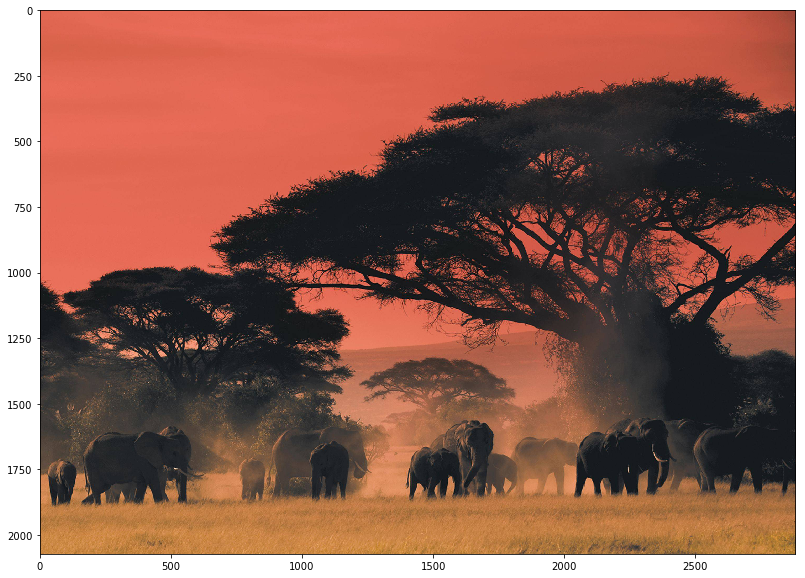

In [7]:
# Load an image and display it
# image taken from here
# https://www.reddit.com/r/AnimalPorn/comments/1l6vu4/elephants_at_the_end_of_the_day_on_the_plains_of/

myimage = cv2.imread('elephants.jpg')
blue,green,red = cv2.split(myimage)
rgb_image = cv2.merge([red,green,blue])

plt.figure(figsize=(15,10))
plt.imshow(rgb_image)

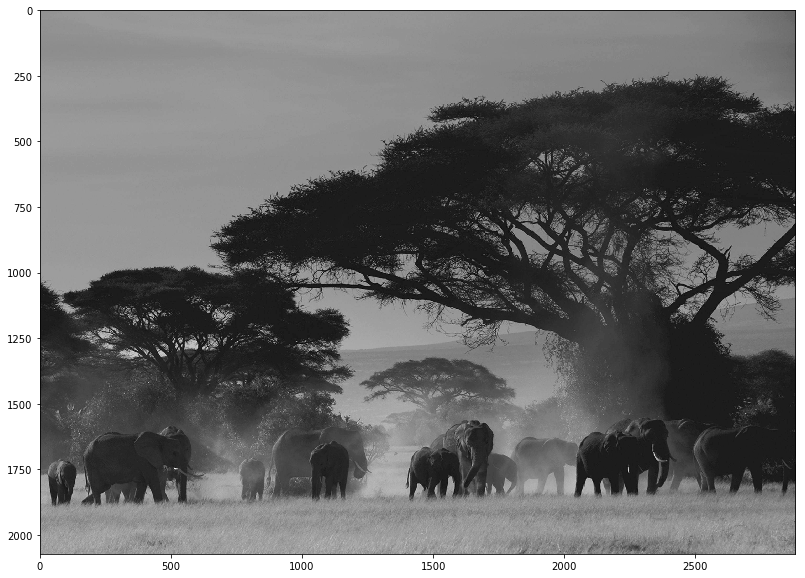

In [6]:
# convert to grey scale
#   greyscale is weighted, e.g.:   Y = 0.2125 R + 0.7154 G + 0.0721 B  
grey_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2GRAY)
grey_image.shape

plt.figure(figsize=(15,10))
plt.imshow(grey_image, cmap='gray')

In [4]:
U, sigma, V = np.linalg.svd(grey_image)
print U.shape, sigma.shape, V.shape

(2073, 2073) (2073,) (2880, 2880)


In [8]:
def plotisvd(i):
    """ reconstruct the image matrix using the 1st i columns of 'U' and the 1st i rows of 'V'.
    """
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray');
    title = "m = %s" % i
    plt.title(title)
    plt.show()

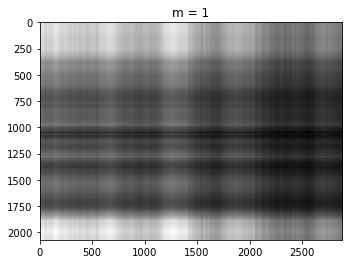

In [9]:
plotisvd(1)

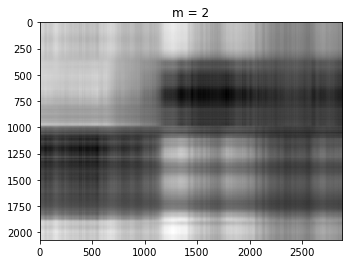

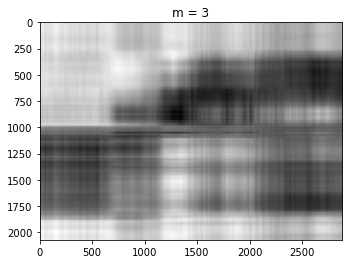

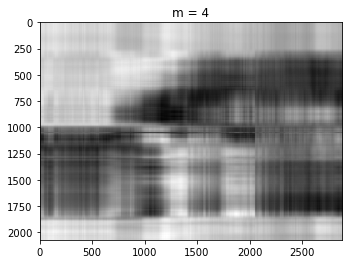

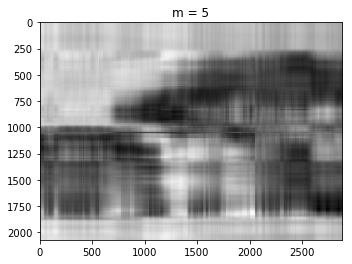

In [10]:
# More detail emerges if more information is used
for i in xrange(2, 6):
    plotisvd(i)

Above is the singular vector with the highest singular value, SV_1.  Each row is this vector with a different brightness set by a scale factor, c_i.  

Row_i = c_i * SV_1 

The original 2073x2880 matrix has been reduced to a 1x2880 matrix.

For the n=2 case, each row is a combination of 2 vectors:

Row_i = c_i * SV_1 + d_i * SV_2

where c_i and d_i is a "scale factor" for each row and so forth with n=3, n=4, etc.

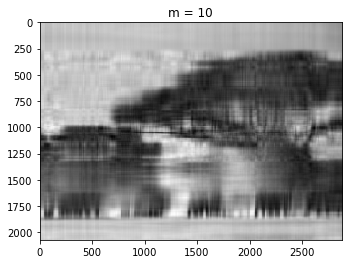

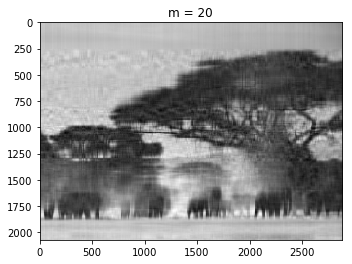

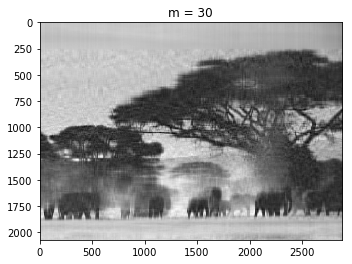

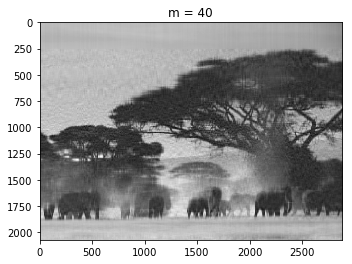

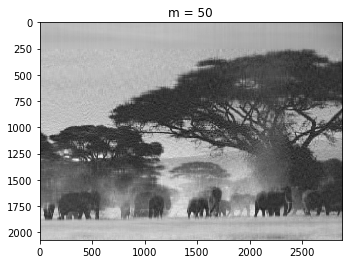

In [12]:
# More detail emerges if more information is used
for i in xrange(10, 51,10):
    plotisvd(i)

At this resolution, n=50 is a very good approximation to the original image.  This represents a compression factor of approximately 40.

#  Statistics in python -- a few basics

Python and R both have excellent libraries for statistics.  This exercise will be presented in python.  Tutorials in R can be found here:
http://www.r-tutor.com/elementary-statistics

In [11]:
%matplotlib inline

## Correlations in data

A common techinique used in data science (and science in general) is to look for correlations between different properties. It is often stated that *"correlation does not imply causation"*, so one should be careful about drawing conclusions without understanding the data.

Still, it seems to be generally true in science that *correlations lead to publications, though not necessarily good ones*.

**"Correlation is not causation but it sure is a hint."** -Edward Tufte


## Pearson correlation coefficient

The Pearson correlation coefficient ("Pearson product-moment correlation coefficient" or "Pearson's r" or "r") is used in many data science areas (e.g. biology, finance).  It quantifies the degree of correlation between 2 variables.  More specifically, it measures how well a straight line will fit 2 variables.

Pearson correlation coefficient(x,y):

pcc(x,y)= sum [(x-E_x)(y-E_y)] / sqrt(sum[(x-E_x)^2] sqrt(sum[(y-E_y)^2]) 

Note: Covariance(x,y) = 1/n sum [(x-x_mean)(y-y_mean)]

i.e. : Covariance(x,y) / (standard_deviation_x standard_deviation_y).

See e.g.:
   https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
   
You can read about other measures of correlation:  https://en.wikipedia.org/wiki/Correlation_coefficient

In [13]:
# Some libraries we will use
#import numpy as np
import numpy
np = numpy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

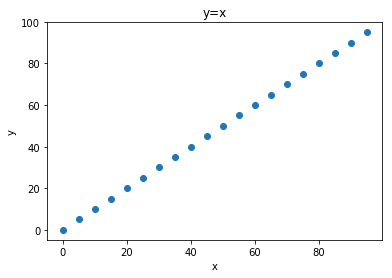

pcc, pvalue =  1.0 0.0


In [14]:
#  Pearson correlation coefficient ranges between 1 and -1 (anti-correlated)
x = np.arange(0.,100.,5.)
y = x
#print x,y
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x')
#plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(x,y)
print 'pcc, pvalue = ', pcc, pvalue
# pvalue : 0.05 means that there's a 95% chance that there is a real effect or similarly, that there's a 5% chance of just
# seeing a random effect

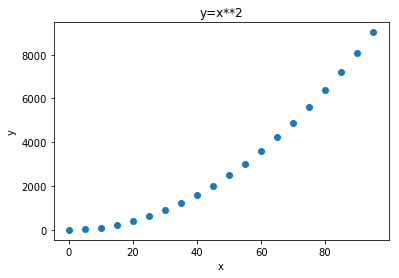

pcc, pvalue =  0.965325531372 6.06770947247e-12


In [15]:
x = np.arange(0.,100.,5.)
y = x**2
#print x,y
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x**2')
#plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(x,y)
print 'pcc, pvalue = ', pcc, pvalue

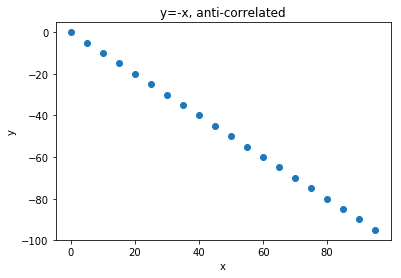

pcc, pvalue =  -1.0 0.0


In [16]:
##  Pearson's correlation coefficien near -1 means anti-correlation
x = np.arange(0.,100.,5.)
y = -x
#print x,y
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=-x, anti-correlated')
#plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(x,y)
print 'pcc, pvalue = ', pcc, pvalue

x mean:  51.4921646165    y mean: 50.0694391748
x median:  51.5126113483    y median: 47.8933201781
x standard deviation:  25.9889465353    y standard deviation: 28.6038186754
pcc, pvalue =  0.0941926167697 0.351254662929


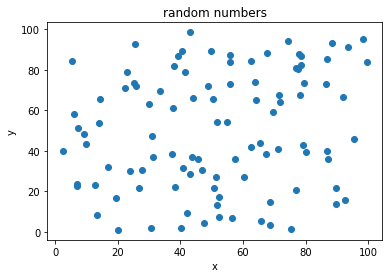

In [20]:
##  Pearson's correlation coefficien near 0 means no correlation
x = np.random.uniform(0.,100.,size=100)
y = np.random.uniform(0.,100.,size=100)
#print x,y
plt.scatter(x,y)

print "x mean: ",x.mean(),"   y mean:", y.mean()
print "x median: ",np.median(x),"   y median:", np.median(y)
print "x standard deviation: ",x.std(),"   y standard deviation:", y.std()
print 'pcc, pvalue = ', pcc, pvalue


plt.xlabel('x')
plt.ylabel('y')
plt.title('random numbers')
#plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(x,y)

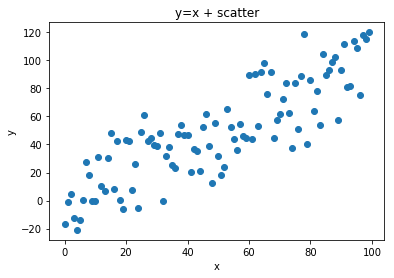

pcc, pvalue =  0.84346370767 3.38563714135e-28


In [21]:
npoints = 100
x = np.arange(0.,100.,100./npoints)
mu = 0.
sigma = 20.0 
yscatter = np.random.normal(mu, sigma, npoints)
y = x + yscatter   ## Gaussian scatter
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x + scatter')
#plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(x,y)
print 'pcc, pvalue = ', pcc, pvalue

## Excercise to do :   Try a few different values for the scatter and y-x relation to see how the correlation coefficient changes

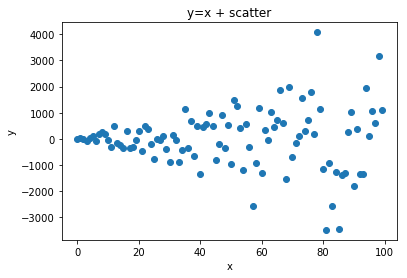

pcc, pvalue =  0.022931053508 0.820845766804


In [33]:
npoints = 100
x = np.arange(0.,100.,100./npoints)
mu = 0.
sigma = 20.0 
yscatter = np.random.normal(mu, sigma, npoints)
y = x*yscatter   ## Gaussian scatter
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x + scatter')
#plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(x,y)
print 'pcc, pvalue = ', pcc, pvalue

## Anscombe's quartet
Pearson's correlation only can be misleading. These 4 plots all have identical Pcc values, but look very different (Frank Anscombe, statistician).

In [34]:
x =  numpy.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = numpy.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = numpy.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = numpy.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = numpy.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = numpy.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])


(0.81642051634484003, 0.0021696288730787888)

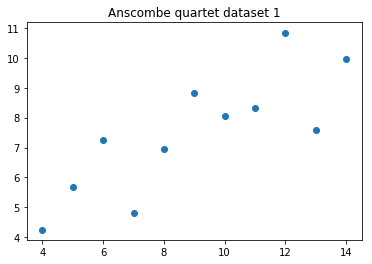

In [35]:
##plt.plot(x, y1, 'ks', marker='o', color='blue')
plt.scatter(x,y1)
plt.title(u"Anscombe quartet dataset 1")
##plt.margins(0.1)

pearsonr(x, y1)

(0.81623650600024267, 0.0021788162369108031)

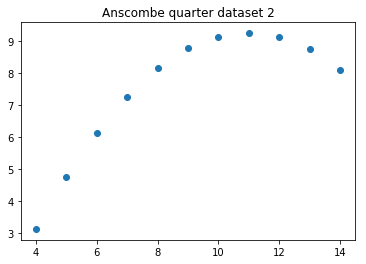

In [36]:
plt.scatter(x,y2)
plt.title(u"Anscombe quarter dataset 2")

pearsonr(x, y2)

(0.81628673948959807, 0.0021763052792280304)

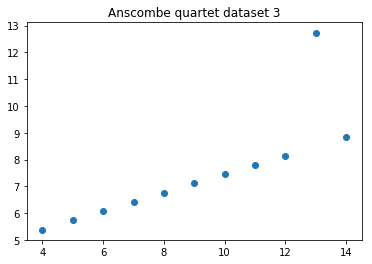

In [37]:
plt.scatter(x, y3)
plt.title(u"Anscombe quartet dataset 3")

pearsonr(x, y3)

(0.81652143688850298, 0.0021646023471972127)

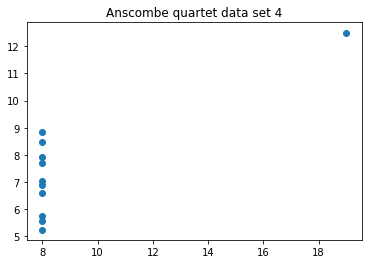

In [38]:
## As a "rule of thumb", 1 data point is not enough indicate a correlation.  
##  Moreover, the "last" or "first" data point in an experiment is often "bad".

plt.scatter(x4, y4)
plt.title(u"Anscombe quartet data set 4")

pearsonr(x4, y4)

# Note that a p-value of 0.05 is often asserted to be a "result"

## Fitting data

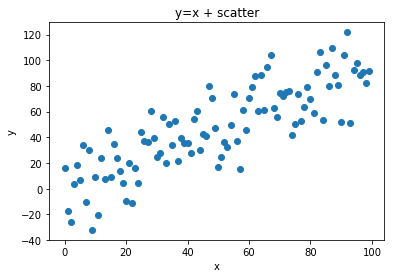

pcc, pvalue =  0.828525227148 2.01237919055e-26


In [39]:
npoints = 100
x = np.arange(0.,100.,100./npoints)
mu = 0.
sigma = 20.0 
yscatter = np.random.normal(mu, sigma, npoints)
y = x + yscatter   ## Gaussian scatter
plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x + scatter')

#plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(x,y)
print 'pcc, pvalue = ', pcc, pvalue

In [41]:
# Fit a line to some data using least squares minimization

from scipy.optimize import leastsq

xdata = x
ydata = y

def yfit_linear(x, a):  
    return a[0] + a[1] * x
    
def yfit_quadratic(x,a):
    return a[0] + a[1] * x + a[2] * x**2 
    
def funcdiff_linear(a, xdata, ydata):   
    return yfit_linear(xdata, a) - ydata
    
def funcdiff_quadratic(a, xdata, ydata):   
    return yfit_quadratic(xdata, a) - ydata

In [42]:
a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_linear, a_init, args=(xdata,ydata))
result

(array([ 0.64206616,  0.95566892,  0.        ]), 2)

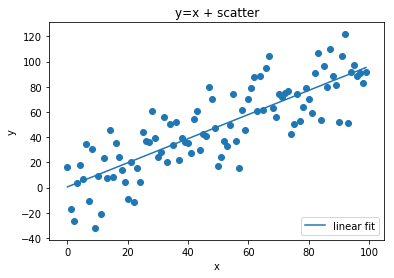

In [43]:
yfit = yfit_linear(xdata,result[0])

plt.plot(xdata,yfit, label='linear fit')
plt.scatter(xdata,ydata)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x + scatter')
plt.legend(loc='lower right')
plt.show()

## Exercise to do:  Make and plot a quadratic fit to the same data

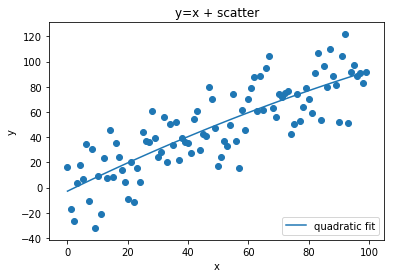

(array([ -2.78356769e+00,   1.16540160e+00,  -2.11851186e-03]), 1)

In [47]:
a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_quadratic, a_init, args=(xdata,ydata))

yfit = yfit_quadratic(xdata,result[0])

plt.plot(xdata,yfit, label='quadratic fit')
plt.scatter(xdata,ydata)


plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x + scatter')
plt.legend(loc='lower right')

plt.show()
result

In [ ]:
# Now reverse the linear fit, and fit x vs y rather than y vs x
#  Is the result the same

a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_linear, a_init, args=(ydata,xdata))
result

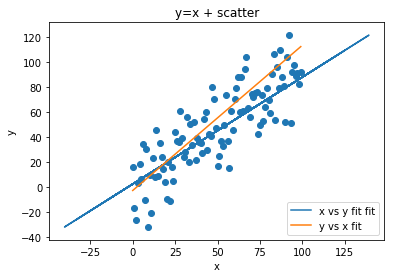

In [48]:
yfit = yfit_linear(xdata,result[0])

xfit_rev = yfit_linear(ydata,result[0])
plt.plot(xfit_rev, ydata, label='x vs y fit fit')

plt.plot(xdata,yfit, label='y vs x fit')
plt.scatter(xdata,ydata)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x + scatter')
plt.legend(loc='lower right')
plt.show()

In [50]:
# Which fit is better?  Why?
#The x vs y fit minizes the distance in the y-direction, which is where we added the random scatter that we want to fit away

## Similar exercise with logarithmic data -- Nature likes power laws.

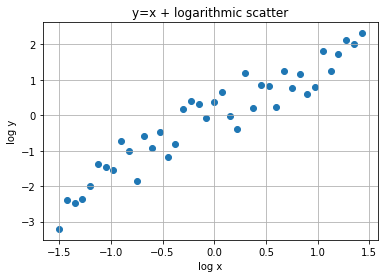

pcc, pvalue =  0.946576670965 2.8499073616e-20


In [51]:
# Fit a line to some data using least squares minimization

# Defining a simple power law function with scatter
npoints = 40
logxmin = -1.5
logxmax = 1.5
slope = 1.5
logx = np.arange(logxmin,logxmax,(logxmax-logxmin)/npoints)
mu = 0.
logsigma = 0.4
logyscatter = np.random.normal(mu, logsigma, npoints)
logy = slope * logx + logyscatter   ## Gaussian scatter
plt.scatter(logx,logy)

plt.xlabel('log x')
plt.ylabel('log y')
plt.title('y=x + logarithmic scatter')

plt.grid(True)
plt.show()
pcc, pvalue = pearsonr(logx,logy)
print 'pcc, pvalue = ', pcc, pvalue
# logx, logy, logyscatter

In [52]:
from scipy.optimize import leastsq

xdata = logx
ydata = logy

def yfit_linear(x, a):  
    return a[0] + a[1] * x
    
def yfit_quadratic(x,a):
    return a[0] + a[1] * x + a[2] * x**2 
    
def funcdiff_linear(a, xdata, ydata):   
    return yfit_linear(xdata, a) - ydata
    
def funcdiff_quadratic(a, xdata, ydata):   
    return yfit_quadratic(xdata, a) - ydata

In [53]:
a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_linear, a_init, args=(xdata,ydata))
print(type(result))
print(result)

<type 'tuple'>
(array([-0.03732751,  1.51405638,  0.        ]), 3)


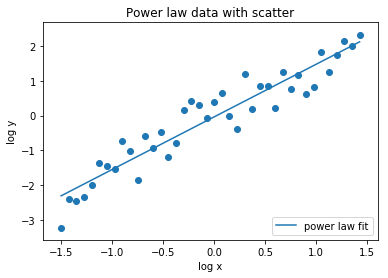

In [54]:
yfit = yfit_linear(xdata,result[0])

plt.plot(xdata,yfit, label='power law fit')
plt.scatter(xdata,ydata)

plt.xlabel('log x')
plt.ylabel('log y')
plt.title('Power law data with scatter')
plt.legend(loc='lower right')
plt.show()

(array([-0.03732751,  1.51405638,  0.        ]), 3)
(array([ 0.01819042,  0.59179262,  0.        ]), 2)


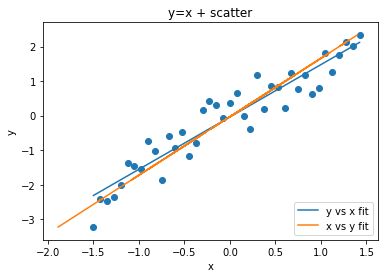

In [55]:
# Now reverse the linear fit, and fit x vs y rather than y vs x
#  Is the result the same

a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_linear, a_init, args=(xdata,ydata))
print(result)

yfit = yfit_linear(xdata,result[0])  # y vs x fit
plt.plot(xdata,yfit, label='y vs x fit')

result = leastsq(funcdiff_linear, a_init, args=(ydata,xdata))
xfit_rev = yfit_linear(ydata,result[0])  # x vs y fit
plt.plot(xfit_rev, ydata, label='x vs y fit')
print(result)

plt.scatter(xdata,ydata)

plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x + scatter')
plt.legend(loc='lower right')
plt.show()

## Kolmogorov-Smirnov Test
A statistical comparison between two samples.  It measures a probability that two samples belong to the same parent distirubition.
https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

Other tests.  Anderson-Darling -- a refinement of the K-S test.

Reduced Chi-squared to test a fit to data.

In [56]:
# create 2 samples.
xran1 = np.random.uniform(0.,100.,size=100)
yran1 = np.random.uniform(0.,100.,size=100)

xran2 = np.random.uniform(0.,100.,size=100)
yran2 = np.random.uniform(0.,100.,size=100)

In [57]:
from scipy.stats import ks_2samp

In [58]:
ks_2samp(xran1,yran1)

Ks_2sampResult(statistic=0.080000000000000016, pvalue=0.89375155241057314)

In [59]:
ks_2samp(xran2,yran2)

Ks_2sampResult(statistic=0.060000000000000053, pvalue=0.99210183947834774)

In [60]:
ks_2samp(xran2,yran1)

Ks_2sampResult(statistic=0.060000000000000053, pvalue=0.99210183947834774)

In [61]:
# Defining a simple power law function with scatter
npoints = 40
logxmin = -1.5
logxmax = 2.5
slope = 1.5
logx = np.arange(logxmin,logxmax,(logxmax-logxmin)/npoints)
mu = 0.
logsigma = 0.4
logyscatter = np.random.normal(mu, logsigma, npoints)
logy = slope * logx + logyscatter   ## Gaussian scatter

#  2nd function with smaller scatter
logsigma = 0.4
slope = 1.9
logyscatter = np.random.normal(mu, logsigma, npoints)
logy2 = slope * logx + logyscatter  ## Gaussian scatter

ks_2samp(logy, logy2)

Ks_2sampResult(statistic=0.15000000000000002, pvalue=0.7236654245436781)

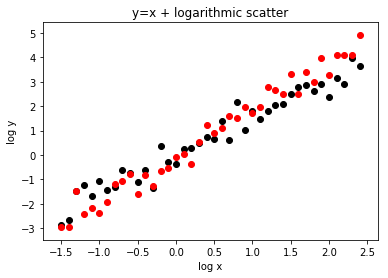

In [62]:
plt.scatter(logx,logy,color="black")
plt.scatter(logx,logy2,color="red")
plt.xlabel('log x')
plt.ylabel('log y')
plt.title('y=x + logarithmic scatter')
plt.show()

## reduced chi-squared test-- a standard way of testing the quality of a fit for data points with uncertainties

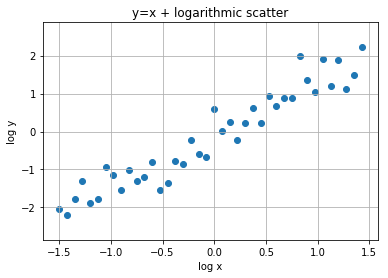

In [72]:
# Defining a simple power law function with scatter and ERRORS
npoints = 40
logxmin = -1.5
logxmax = 1.5
slope = 1.5
logxdata = np.arange(logxmin,logxmax,(logxmax-logxmin)/npoints)
mu = 0.
logsigma = 0.4
logerror = .4
np.random.seed(42)

logyscatter = np.random.normal(mu, logsigma, npoints)
logydata = slope * logxdata + logyscatter  ## Gaussian scatter
logyerror = logydata * 0. + logerror

plt.scatter(logxdata,logydata)
#plt.plot(logx,logy)
plt.errorbar(logxdata,logydata,yerr=logerror,fmt='None')

plt.xlabel('log x')
plt.ylabel('log y')
plt.title('y=x + logarithmic scatter')

plt.grid(True)
plt.show()

In [64]:
def reduced_chi_squared(ymodel, ydata, yerrors, number_fit_params):
    rchisq = np.sum((ydata - ymodel)**2 / yerrors**2)
    n_degrees_of_freedom = len(ydata) - number_fit_params -1
    return rchisq / float(n_degrees_of_freedom)

<type 'tuple'>
(array([-0.09153713,  1.39113624,  0.        ]), 3)


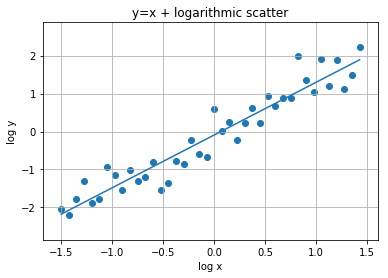

reduced chi squared is  0.896897841332


In [73]:
a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_linear, a_init, args=(logxdata,logydata))
print(type(result))
print(result)
yfit = yfit_linear(logxdata,result[0])
plt.plot(logxdata,yfit, label='y vs x fit')

plt.scatter(logxdata,logydata)
#plt.plot(logx,logy)
plt.errorbar(logxdata,logydata,yerr=logerror,fmt='None')

plt.xlabel('log x')
plt.ylabel('log y')
plt.title('y=x + logarithmic scatter')
plt.grid(True)
plt.show()

rchisq = reduced_chi_squared(yfit, logydata, logyerror, 2)
print "reduced chi squared is ", rchisq

In [66]:
from scipy.stats import chisqprob

def chisquareprob(chisqvalue, ydata, number_fit_params):
    n_degrees_of_freedom = len(ydata) - number_fit_params -1
    return chisqprob(chisqvalue * n_degrees_of_freedom, n_degrees_of_freedom)

In [67]:
print("Probably of null hypothesis is ", chisquareprob(rchisq, ydata, 2))

('Probably of null hypothesis is ', 0.64854940518171744)


##  Real Data.  Bird characteristics and distances travelled during migration.

http://datadryad.org/resource/doi:10.5061/dryad.5q034


In [125]:
import pandas as pd
df = pd.read_csv('bird_data_vincze_etal_2015.csv', sep=',')
#df.values
df

,Species,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
0,Accipiter gentilis,542.0,1100.0,7.674,1.088,4.617,0.837,5.841,0.193
1,Accipiter nisus,2938.1,260.0,3.081,0.499,1.593,0.440,5.891,0.093
2,Acrocephalus scirpaceus,3577.0,14.0,0.483,0.066,0.282,0.070,4.835,0.008
3,Aegithalos caudatus,26.1,7.5,0.456,0.035,0.283,0.059,4.463,0.007
4,Aegypius monachus,972.2,9000.0,24.808,2.812,17.936,1.020,NaN,NaN
5,Agapornis fischeri,0.0,42.0,1.997,0.121,1.492,0.120,NaN,NaN
6,Alauda arvensis,1107.4,39.0,1.176,0.087,0.865,0.115,5.430,0.024
7,Alcedo atthis,1302.2,35.0,0.909,0.117,0.505,0.141,6.060,0.013
8,Amazona versicolor,0.0,400.0,7.818,0.622,5.957,0.355,NaN,NaN
9,Anas clypeata,3426.8,737.5,4.015,0.490,2.700,0.245,NaN,NaN


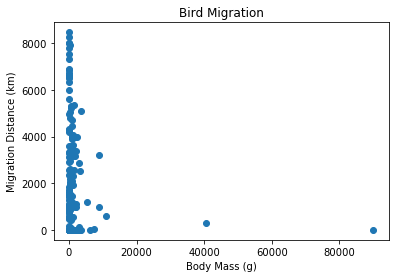

In [75]:
plt.scatter(df['Body mass'], df['Migration distance'])
plt.ylabel('Migration Distance (km)')
plt.xlabel('Body Mass (g)')
plt.title('Bird Migration')
plt.show()

# Exercise to do:
Find what correlates best with what.  Try to fit a relation.

In [120]:
def plotly(xstring, ystring, func, funcdiff, log=False):
    xdata = df[xstring]
    ydata = df[ystring]
    a_init = np.zeros(3)
    pcc, pvalue = pearsonr(xdata, ydata)
    print('Pcc: {}, P-Value: {}'.format(pcc, pvalue))
    
    if log == True:
        xdata = np.log(xdata)
        ydata = np.log(ydata)
        
    plt.scatter(xdata, ydata)
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    result = leastsq(funcdiff, a_init, args=(xdata, ydata))
    yfit = func(xdata, result[0])
    plt.plot(xdata, yfit, color='orange', label='Fit')
    plt.grid(True)
    plt.legend()
    plt.show()

Pcc: 0.646112904622, P-Value: 2.50200089531e-19


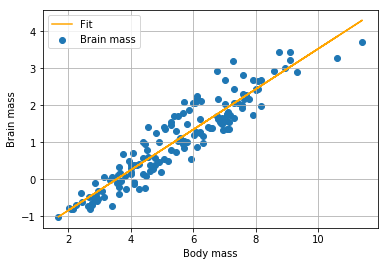

In [121]:
plotly('Body mass', 'Brain mass', func=yfit_linear, funcdiff=funcdiff_linear, log=True)

Pcc: 0.99389066374, P-Value: 1.74964313342e-145


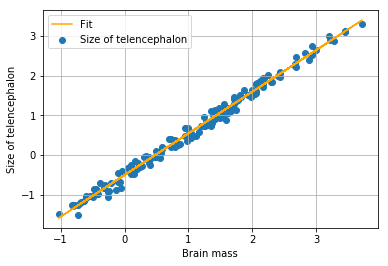

In [122]:
plotly('Brain mass', 'Size of telencephalon', func=yfit_linear, funcdiff=funcdiff_linear, log=True)

Pcc: 0.959935803534, P-Value: 9.02727224864e-85


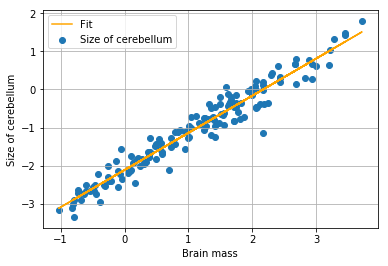

In [123]:
plotly('Brain mass', 'Size of cerebellum', func=yfit_linear, funcdiff=funcdiff_linear, log=True)

Pcc: 0.928776521317, P-Value: 1.54059139898e-66


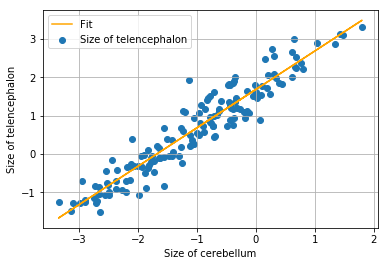

In [124]:
plotly('Size of cerebellum', 'Size of telencephalon', func=yfit_linear, funcdiff=funcdiff_linear, log=True)

## More data to explore as an exercise

2016 Election data by county in USA:
https://github.com/Prooffreader/election_2016_data/tree/master/data

Income by county USA (2014):
https://www.irs.gov/uac/soi-tax-stats-county-data-2014

